In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater

In [4]:
image = cv2.imread('C:/Users/ADMIN/Desktop/Image_Processing/sample_image.png')

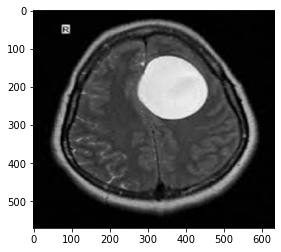

In [5]:
plt.imshow(image)
plt.show()

In [6]:
def showimg(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")

  plt.title(title)
  plt.show()

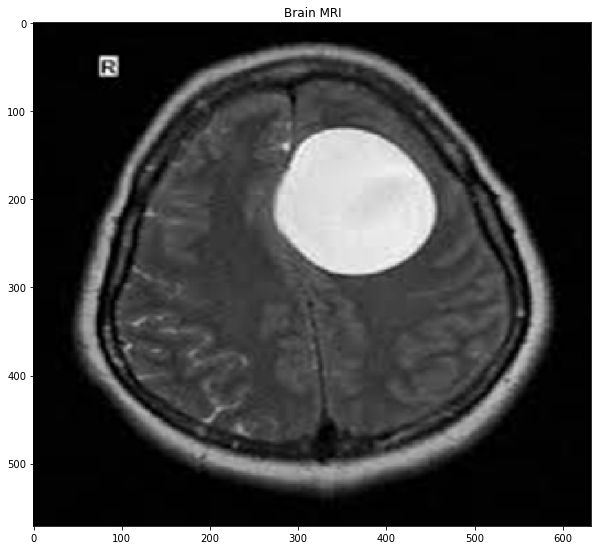

In [7]:
grayimg=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
showimg('Brain MRI',grayimg,'gray')

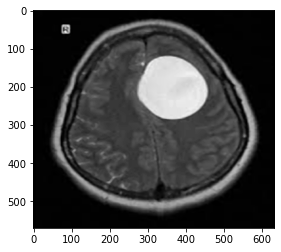

In [8]:
median_filter = cv2.medianBlur(grayimg,5)
plt.imshow(median_filter,cmap='gray')
plt.show()

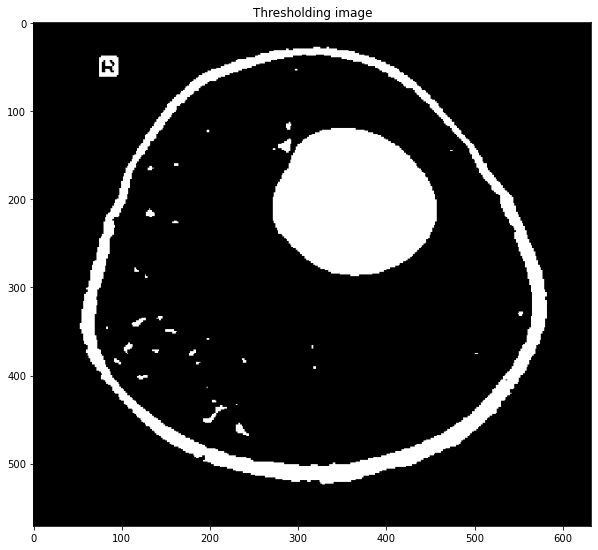

In [9]:
ret,thresh=cv2.threshold(grayimg,0,255,cv2.THRESH_OTSU)
showimg('Thresholding image',thresh,'gray')

In [10]:
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=3)

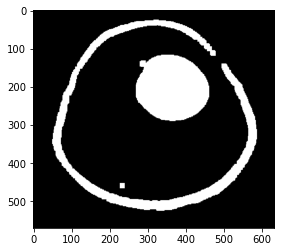

In [11]:
surebg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(surebg,cmap='gray')
plt.show()

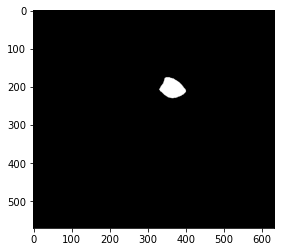

In [12]:
distance_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,surefg = cv2.threshold(distance_transform,0.7*distance_transform.max(),255,0)

plt.imshow(surefg,cmap='gray')
plt.show()

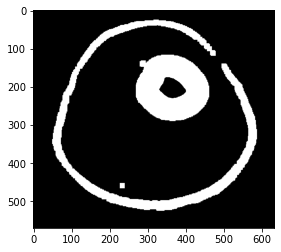

In [13]:
surefg=np.uint8(surefg)
unknownregion=cv2.subtract(surebg,surefg)

plt.imshow(unknownregion,cmap='gray')
plt.show()

In [12]:
ret,markers = cv2.connectedComponents(surefg)
markers = markers+1

markers[unknownregion==255] = 0
markers=cv2.watershed(image,markers)
image[markers== -1]=[255,0,0]

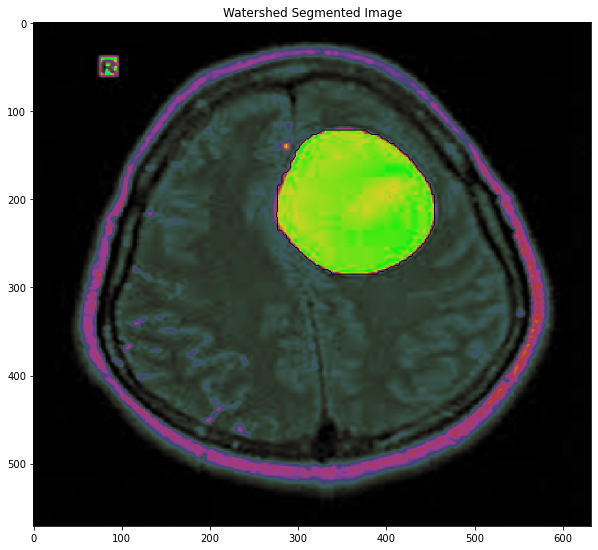

In [13]:
image2=cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
showimg('Watershed Segmented Image',image2,'gray')

In [14]:
ret,markers = cv2.connectedComponents(thresh)
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
large=np.argmax(marker_area)+1


maskimg=markers==large
brainarea = image.copy()
brainarea[maskimg==False] = (0,0,0)

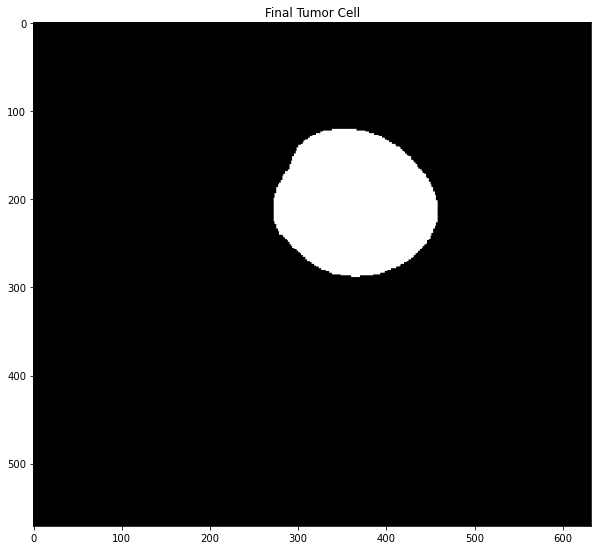

In [15]:
maskimg = np.uint8(maskimg)

kernel=np.ones((8,8),np.uint8)
closing=cv2.morphologyEx(maskimg, cv2.MORPH_CLOSE,kernel)
showimg('Final Tumor Cell',closing,'gray')

[633, 20400, 405, 6, 40, 23801, 9, 142, 6, 3, 15, 23, 64, 17, 17, 8, 24, 21, 81, 6, 41, 6, 64, 8, 24, 36, 4, 31, 18, 11, 9, 41, 2, 14, 2, 139]
37
6
5


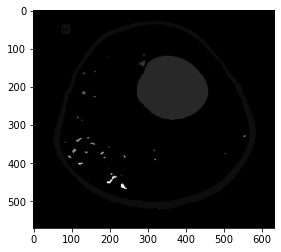

In [33]:
ret,markers = cv2.connectedComponents(thresh)
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
large=np.argmax(marker_area)+1
print(marker_area)
print(np.max(markers))
print(large)
print(np.argmax(marker_area))
plt.imshow(markers,cmap='gray')
plt.show()

In [15]:
ret,markers = cv2.connectedComponents(surefg)
markers = markers+1

markers[unknownregion==255] = 0
markers=cv2.watershed(image,markers)
image[markers== -1]=[255,0,0]
print(markers)
print(image)

[[-1 -1 -1 ... -1 -1 -1]
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 ...
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 [-1 -1 -1 ... -1 -1 -1]]
[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255   0   0]]

 [[255   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255   0   0]]

 ...

 [[255   0   0]
  [  0   0   0]
  [  2   2   2]
  ...
  [  1   1   1]
  [  0   0   0]
  [255   0   0]]

 [[255   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]
